In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [171]:
df = pd.read_csv("C:/Users/jugvi/Downloads/insurance.csv")

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Relplot

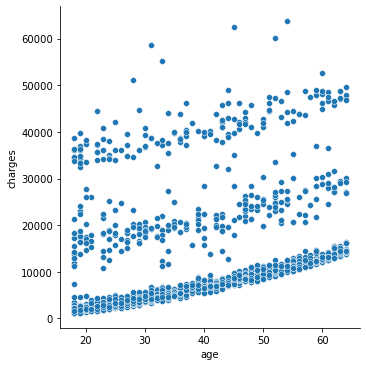

In [29]:
sns.relplot(x = 'age', y = 'charges', data = df)

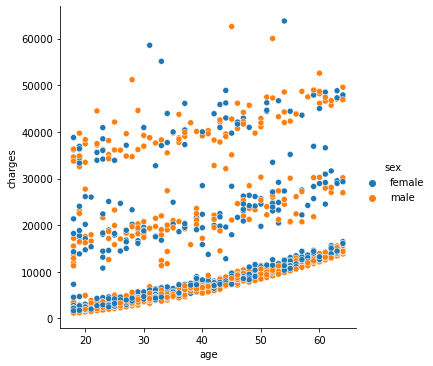

In [30]:
sns.relplot(x = 'age', y = 'charges', hue = 'sex', data = df)

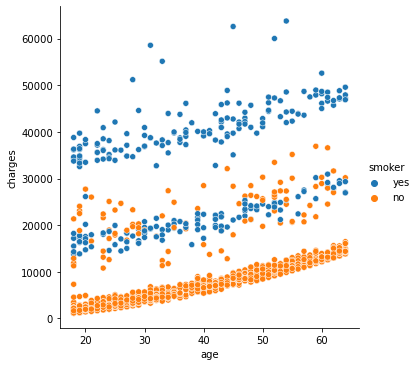

In [31]:
sns.relplot(x = 'age', y = 'charges', hue = 'smoker', data = df)

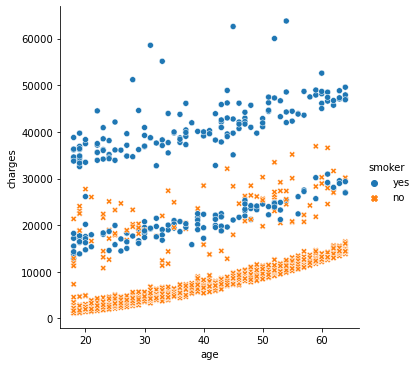

In [32]:
sns.relplot(x = 'age', y = 'charges', hue = 'smoker', style = 'smoker', data = df)

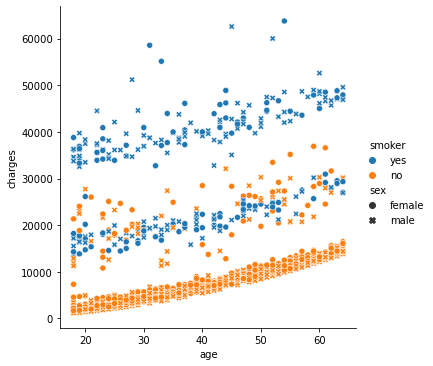

In [33]:
sns.relplot(x = 'age', y = 'charges', hue = 'smoker', style = 'sex', data = df)

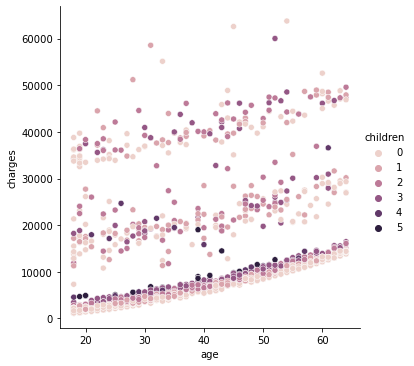

In [34]:
sns.relplot(x = 'age', y = 'charges', hue = 'children', height = 5, data = df)

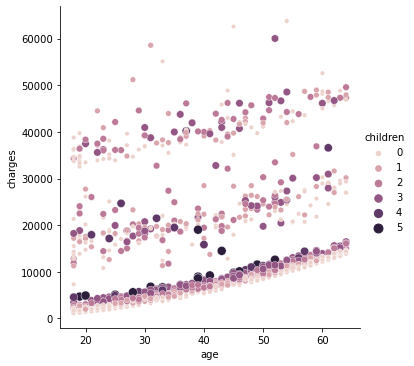

In [37]:
sns.relplot(x = 'age', y = 'charges', hue = 'children', size = 'children', sizes = (20,80), data = df)

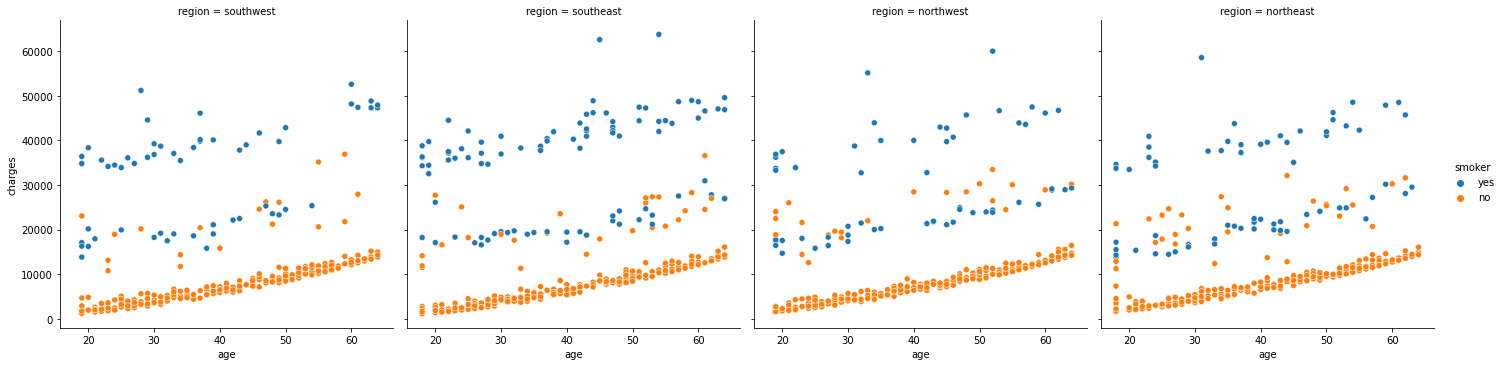

In [38]:
sns.relplot(x = 'age', y = 'charges', hue = 'smoker', col = 'region', data = df)

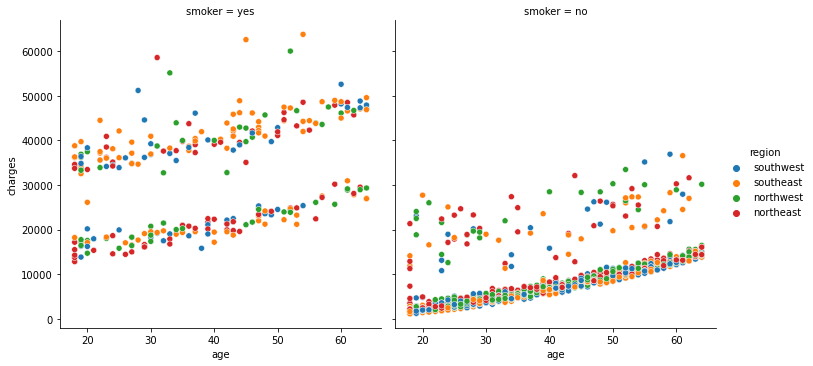

In [39]:
sns.relplot(x = 'age', y = 'charges', hue = 'region', col = 'smoker', data = df)

In [41]:
df.groupby('smoker')['charges'].sum()

smoker
no     8.974061e+06
yes    8.781764e+06
Name: charges, dtype: float64

In [42]:
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [59]:
df.groupby(['region','sex'])['charges'].count()

region     sex   
northeast  female    161
           male      163
northwest  female    164
           male      161
southeast  female    175
           male      189
southwest  female    162
           male      163
Name: charges, dtype: int64

Categorical plot

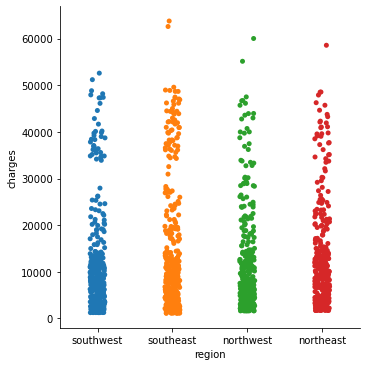

In [46]:
sns.catplot(x = 'region', y = 'charges', data = df);

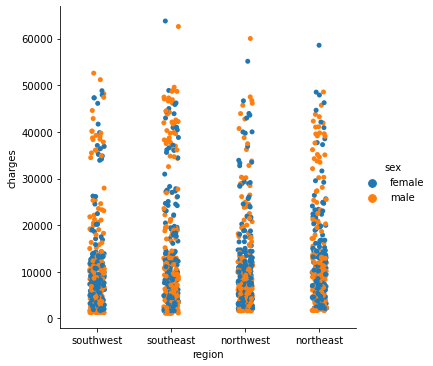

In [48]:
sns.catplot(x = 'region', y = 'charges', hue = 'sex', data = df);

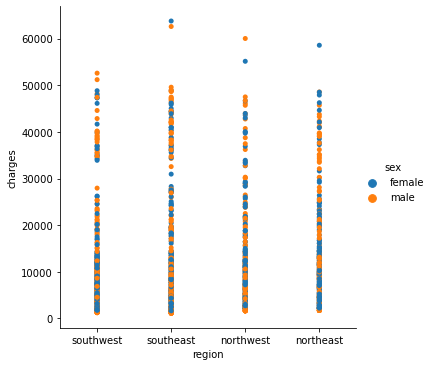

In [49]:
sns.catplot(x = 'region', y = 'charges', jitter = False, hue = 'sex', data = df)

C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


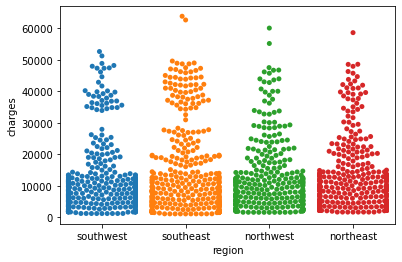

In [51]:
sns.swarmplot(x = 'region', y = 'charges', data = df);

C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


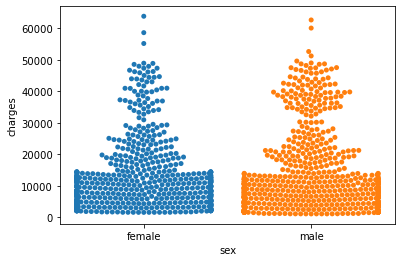

In [52]:
sns.swarmplot(x = 'sex', y = 'charges', data = df);

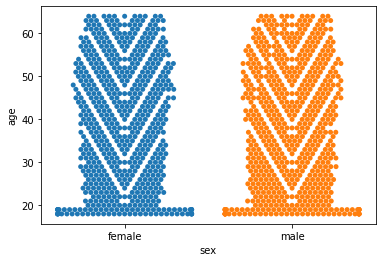

In [53]:
sns.swarmplot(x = 'sex', y = 'age', data = df);

C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


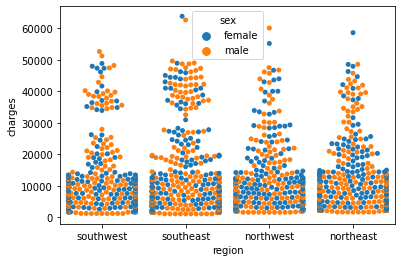

In [54]:
sns.swarmplot(x = 'region', y = 'charges', hue = 'sex', data = df);

C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


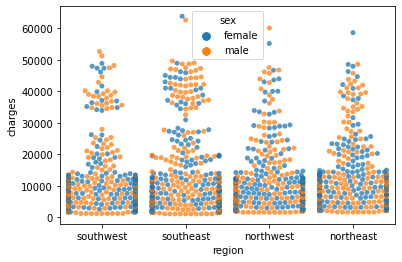

In [56]:
sns.swarmplot(x = 'region', y = 'charges', hue = 'sex', alpha = 0.75, data = df);

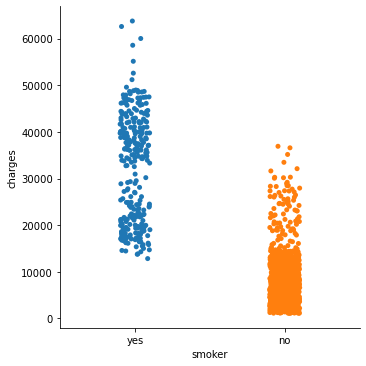

In [60]:
sns.catplot(x = 'smoker', y = 'charges', order = ['yes','no'], data = df)

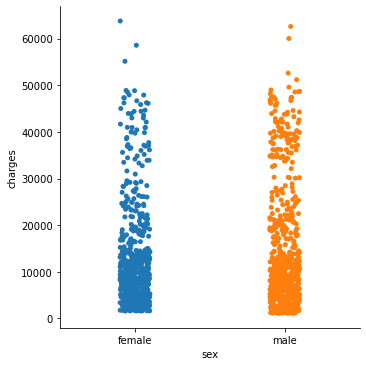

In [61]:
sns.catplot(x = 'sex', y = 'charges', order = ['female','male'], data = df)

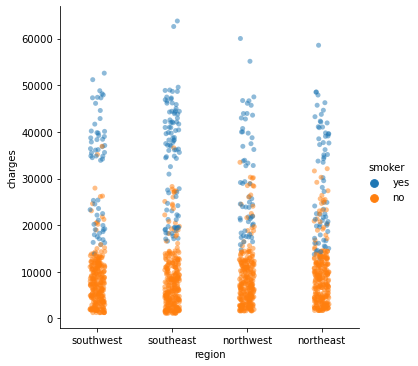

In [62]:
sns.catplot(x = 'region', y = 'charges', hue = 'smoker', alpha = .5, data = df)

C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jugvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='region', ylabel='charges'>

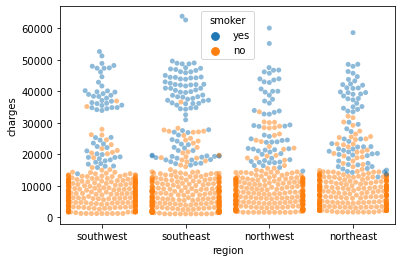

In [63]:
sns.swarmplot(x = 'region', y = 'charges', hue = 'smoker', alpha = .5, data = df)

Boxplot

<AxesSubplot:xlabel='region', ylabel='charges'>

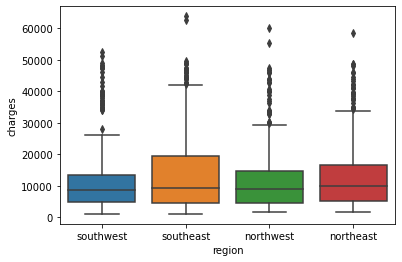

In [64]:
sns.boxplot(x = 'region', y = 'charges', data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

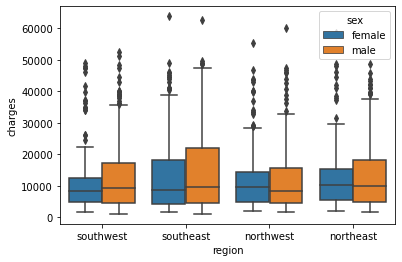

In [66]:
sns.boxplot(x = 'region', y = 'charges', hue = 'sex', data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

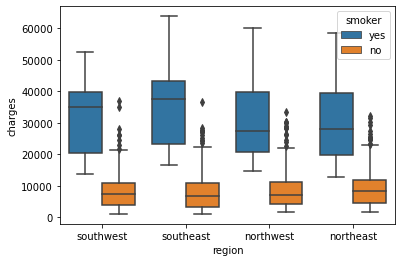

In [67]:
sns.boxplot(x = 'region', y = 'charges', hue = 'smoker', data = df)

In [68]:
df['south'] = df['region'].isin(['southwest','southeast'])

In [69]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,south
1020,51,male,37.00,0,no,southwest,8798.59300,True
1308,25,female,30.20,0,yes,southwest,33900.65300,True
553,52,female,31.73,2,no,northwest,11187.65670,False
1211,39,male,34.10,2,no,southeast,23563.01618,True
1335,18,female,36.85,0,no,southeast,1629.83350,True


<AxesSubplot:xlabel='region', ylabel='charges'>

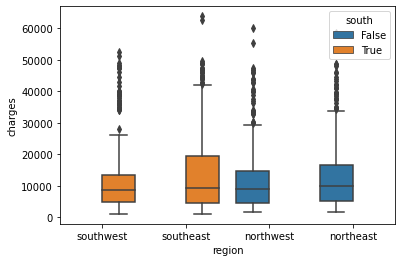

In [70]:
sns.boxplot(x = 'region', y = 'charges', hue = 'south', data = df)

Boxen Plot

<AxesSubplot:xlabel='smoker', ylabel='charges'>

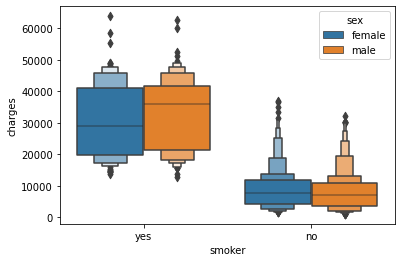

In [71]:
sns.boxenplot(x = 'smoker', y = 'charges', hue = 'sex', data = df)

Violin Plot

<AxesSubplot:xlabel='region', ylabel='charges'>

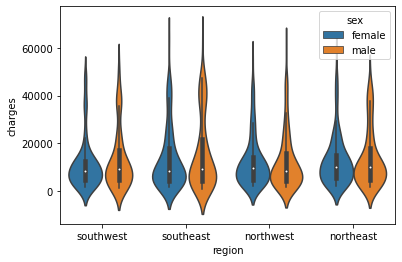

In [72]:
sns.violinplot(x = 'region', y = 'charges', hue = 'sex', data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

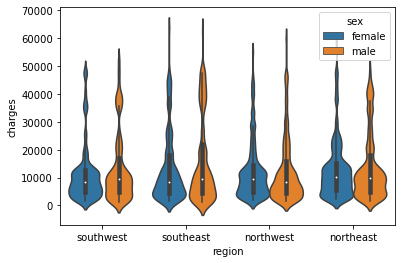

In [73]:
sns.violinplot(x = 'region', y = 'charges', hue = 'sex', bw = .15, data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

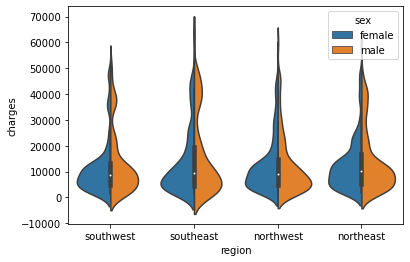

In [74]:
sns.violinplot(x = 'region', y = 'charges', hue = 'sex', bw = .25, split = True, data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

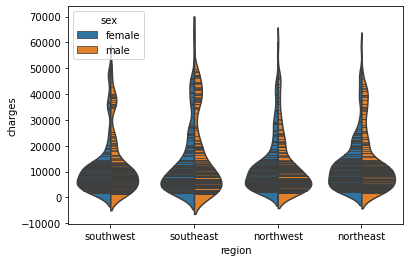

In [75]:
sns.violinplot(x = 'region', y = 'charges', hue = 'sex', bw = .25, split = True, inner = 'stick',  data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

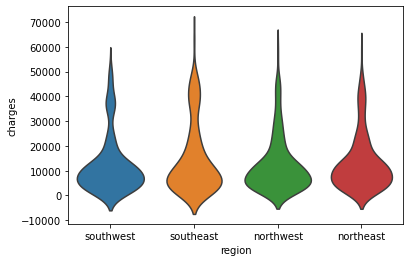

In [76]:
sns.violinplot(x = 'region', y = 'charges', inner = None, data = df)

Overlapping two plots

<AxesSubplot:xlabel='region', ylabel='charges'>

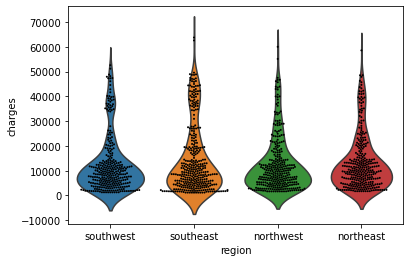

In [78]:
sns.violinplot(x = 'region', y = 'charges', inner = None, data = df)
sns.swarmplot(x = 'region', y = 'charges', color = 'k', size = 2, data = df)

Bar Plot

<AxesSubplot:xlabel='smoker', ylabel='charges'>

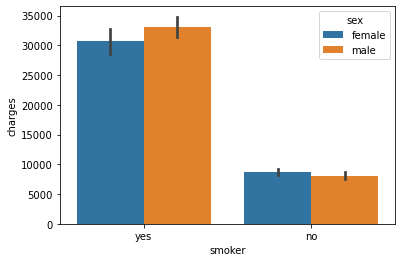

In [79]:
sns.barplot(x = 'smoker', y = 'charges', hue = 'sex', data = df)

<AxesSubplot:xlabel='region', ylabel='bmi'>

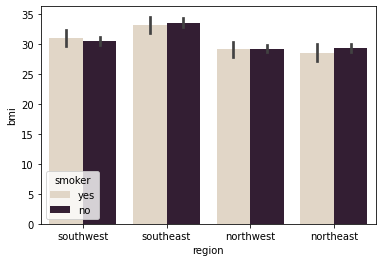

In [80]:
sns.barplot(x = 'region', y = 'bmi', hue = 'smoker', palette = 'ch:.25', data = df)

Bars by categories

<AxesSubplot:xlabel='region', ylabel='count'>

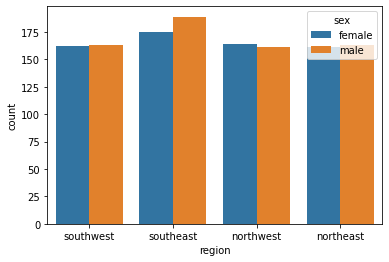

In [84]:
sns.countplot(x = 'region', hue = 'sex', data = df)

<AxesSubplot:xlabel='sex', ylabel='count'>

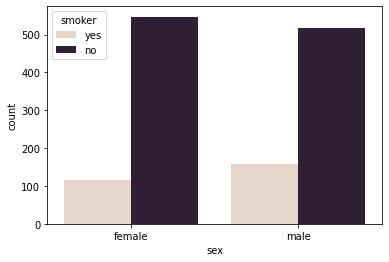

In [89]:
sns.countplot(x = 'sex', hue = 'smoker', palette = 'ch:.15', data = df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

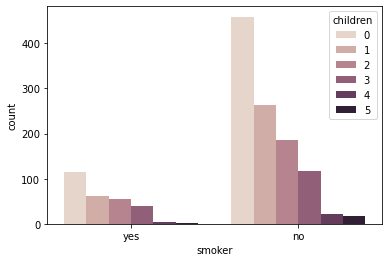

In [91]:
sns.countplot(x = 'smoker', hue = 'children', palette = 'ch:.15', data = df)

Point Plot

<AxesSubplot:xlabel='region', ylabel='charges'>

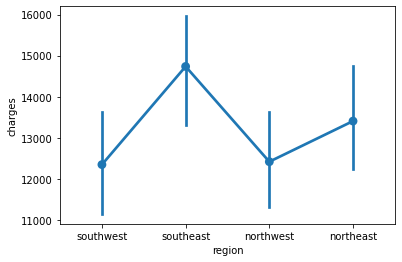

In [92]:
sns.pointplot(x = 'region', y = 'charges', data = df)

<AxesSubplot:xlabel='region', ylabel='age'>

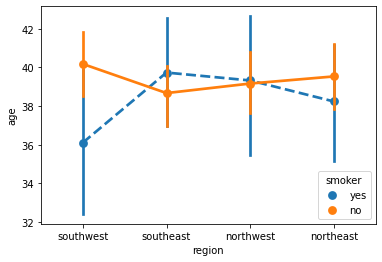

In [96]:
sns.pointplot(x = 'region', y = 'age', hue = 'smoker', linestyles = ['--' , '-'], data = df)

<AxesSubplot:xlabel='region', ylabel='count'>

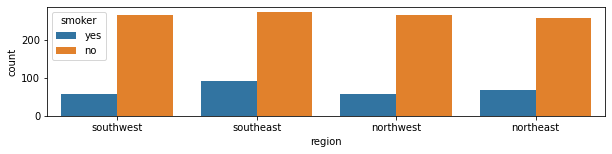

In [97]:
f, ax = plt.subplots(figsize = (10,2))
sns.countplot(x = 'region', hue = 'smoker', data = df)

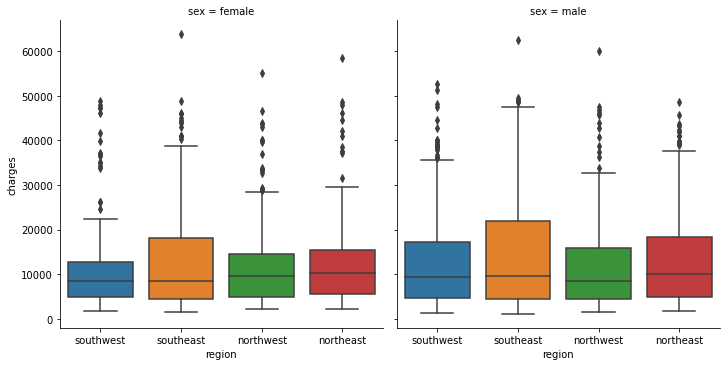

In [98]:
sns.catplot(x = 'region', y = 'charges', col = 'sex', kind = 'box', data = df)

Extra Plots

<AxesSubplot:xlabel='charges', ylabel='Count'>

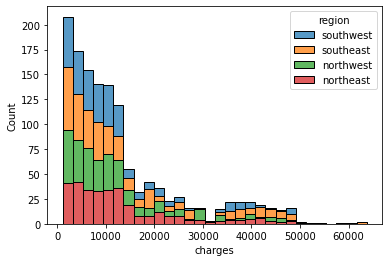

In [102]:
sns.histplot(data = df, x = 'charges' , hue = 'region', multiple = 'stack')

<AxesSubplot:xlabel='charges', ylabel='Density'>

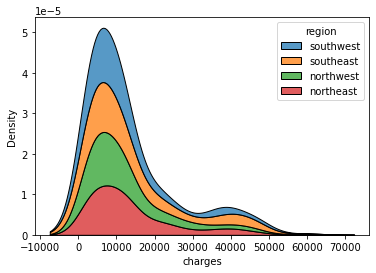

In [103]:
sns.kdeplot(data = df, x = 'charges', hue = 'region', multiple = 'stack')

<AxesSubplot:xlabel='bmi', ylabel='Density'>

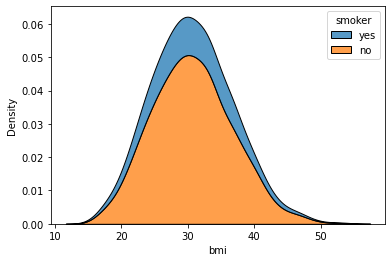

In [104]:
sns.kdeplot(data = df, x = 'bmi', hue = 'smoker', multiple = 'stack')

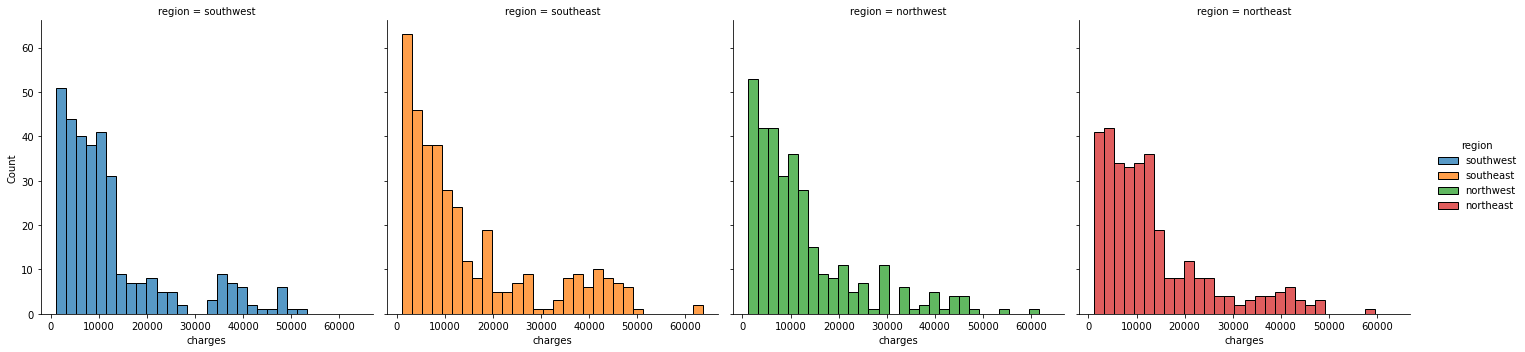

In [105]:
sns.displot(data = df, x = 'charges', hue = 'region', col = 'region')

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


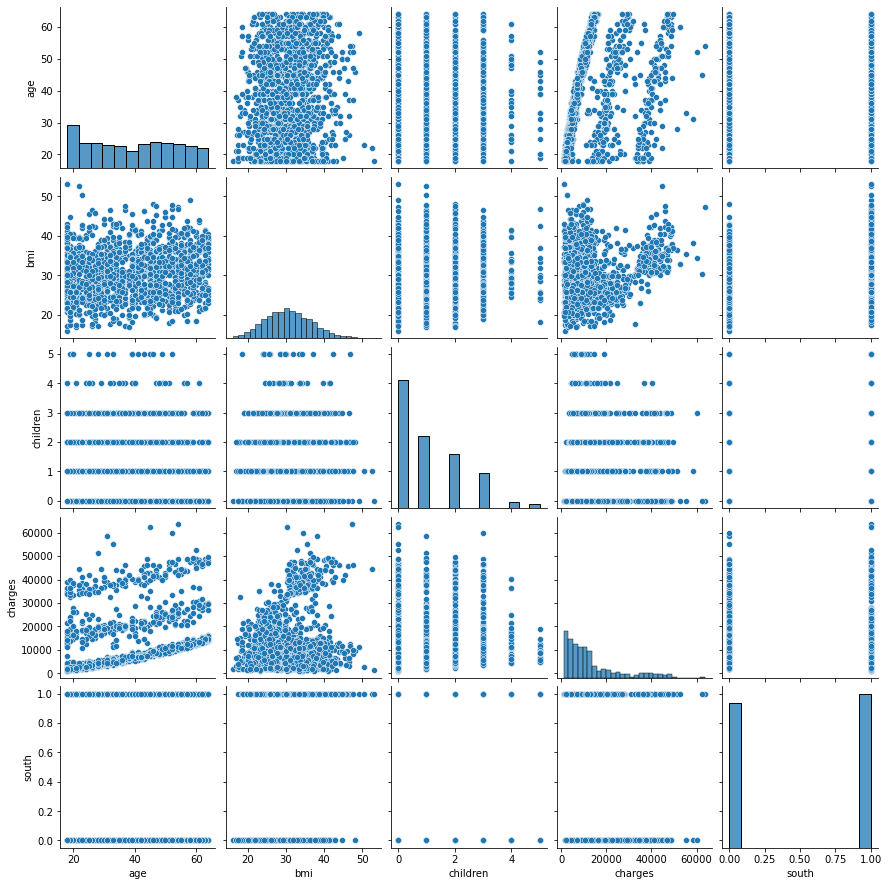

In [106]:
sns.pairplot(df)

In [107]:
df.corr()

,age,bmi,children,charges,south
age,1.000000,0.109272,0.042469,0.299008,-0.001772
bmi,0.109272,1.000000,0.012759,0.198341,0.235113
children,0.042469,0.012759,1.000000,0.067998,-0.001735
charges,0.299008,0.198341,0.067998,1.000000,0.028799
south,-0.001772,0.235113,-0.001735,0.028799,1.000000


<AxesSubplot:>

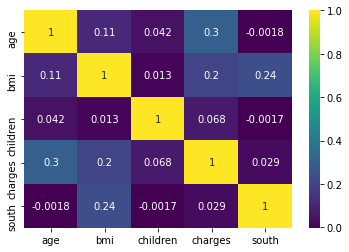

In [112]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

Regression

In [115]:
df.head()

,age,sex,bmi,children,smoker,region,charges,south
0,19,female,27.900,0,yes,southwest,16884.92400,True
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


<AxesSubplot:xlabel='age', ylabel='charges'>

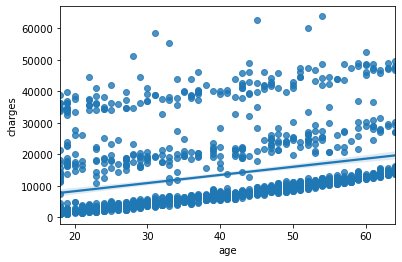

In [120]:
sns.regplot(x = 'age', y = 'charges', data = df )

Simple Regression

In [121]:
model_df = df[['age','charges']]

In [122]:
model_df

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
...,...,...
1333,50,10600.54830
1334,18,2205.98080
1335,18,1629.83350
1336,21,2007.94500


In [123]:
x = model_df.age

In [124]:
y = model_df.charges

In [125]:
model = LinearRegression()

In [128]:
model.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [129]:
model.intercept_

3165.885006063025

In [130]:
model.coef_

array([257.72261867])

In [132]:
model.score(np.array(x).reshape(-1,1),y)

0.08940589967885804

Multiple Linear Regression

In [133]:
df.corr()

,age,bmi,children,charges,south
age,1.000000,0.109272,0.042469,0.299008,-0.001772
bmi,0.109272,1.000000,0.012759,0.198341,0.235113
children,0.042469,0.012759,1.000000,0.067998,-0.001735
charges,0.299008,0.198341,0.067998,1.000000,0.028799
south,-0.001772,0.235113,-0.001735,0.028799,1.000000


In [135]:
x = df[['age','bmi','children']]
y = df['charges']

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [148]:
model = LinearRegression()

In [149]:
model.fit(x_train, y_train)

LinearRegression()

In [150]:
model.intercept_  #B0

-7778.088378119262

In [151]:
model.coef_  #B1,B2,B3

array([245.67422801, 354.79258189, 430.01815667])

In [152]:
model.predict(x_test)

array([12443.85874985, 10604.78239432, 20309.51401919, 16106.23748419,
        8581.71514075, 13948.43645501, 14052.35033135,  7088.04723668,
       12399.54008132, 10757.75704356,  6667.43054331,  8822.14601984,
       12021.15433286, 15347.75749282, 17184.89433865, 15489.80500811,
       10853.18533725, 23110.18721566, 15630.02661777, 11439.26409434,
       14584.3432532 ,  9360.68120753,  5980.41451851, 11660.97018812,
        9366.37766538, 17839.43851664, 17054.41875574, 14395.77113751,
       11603.38416412, 12273.85473839,  3914.61507549, 15187.4209683 ,
       14556.10806057, 11744.94776773, 13592.10552964, 17057.25641468,
       18104.58706675, 18017.85923371, 14212.74806282, 13612.93071139,
       20773.49462908, 14364.97317528, 10234.02414624, 15974.41104164,
       11240.21454506, 12258.7171488 , 11007.08814141, 14505.12511083,
       15480.06784706, 15080.09811583, 13469.81989861, 10847.97239254,
       15663.78004865, 18622.32707837, 16365.3931486 , 18408.84134067,
      

In [153]:
y_test.values

array([ 7281.5056 ,  5267.81815, 12347.172  , 24513.09126,  3736.4647 ,
        7358.17565,  9788.8659 , 17085.2676 ,  8211.1002 , 19798.05455,
        3077.0955 ,  3385.39915,  6837.3687 ,  8538.28845, 26392.26029,
       13012.20865,  3227.1211 , 15170.069  , 11073.176  , 20773.62775,
       39556.4945 ,  2134.9015 ,  2198.18985,  6555.07035,  4340.4409 ,
       12622.1795 ,  7740.337  , 12475.3513 ,  3987.926  , 21082.16   ,
        1241.565  , 40103.89   , 17929.30337,  8302.53565,  3471.4096 ,
        5846.9176 , 13352.0998 ,  9144.565  , 25656.57526,  7726.854  ,
       13887.9685 , 30284.64294,  5266.3656 , 12797.20962,  1146.7966 ,
        7046.7222 ,  8627.5411 , 39597.4072 , 12323.936  , 11454.0215 ,
       40904.1995 ,  3171.6149 ,  7445.918  , 13607.36875, 27346.04207,
       12557.6053 , 10797.3362 ,  5488.262  ,  6282.235  , 40941.2854 ,
        1708.0014 , 23306.547  , 28950.4692 ,  1664.9996 , 17361.7661 ,
        7345.084  , 18157.876  ,  7256.7231 ,  7626.993  , 26236

In [154]:
model.score(x_test, model.predict(x_test))

1.0

In [155]:
model.score(x_train, model.predict(x_train))

1.0

In [159]:
model.score(x_test, y_test) #gives accuracy of test set

0.07021694177413795

In [161]:
model.score(x_train, y_train) #gives accuracy of training set

0.13136494020929546

Using statsmodels

In [164]:
result = smf.ols('charges ~ age', data = df).fit()

In [165]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           4.89e-29
Time:                        19:25:47   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=92b0f4e3200e9f78ed389f8723c2772d5d4b767c33a192e327090e02272027ef
  Stored in directory: c:\users\jugvi\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=68010af6a39b37f55a1c602a0afde8db83d94afe37c21c250e2132f34e8eab3d
  Stored in directory: c:\users\jugvi\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built htmlmin imagehash
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.0.1 which is incompatible.


      Successfully uninstalled MarkupSafe-1.1.1


In [170]:
from pandas_profiling import ProfileReport

In [172]:
design_report = ProfileReport(df)

In [173]:
design_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [174]:
pip install autoviz

  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171030 sha256=95b2e8ccb948b6a482d9f857ae8ef4ea91166995ec8f4944b17ecd9051852df9
  Stored in directory: c:\users\jugvi\appdata\local\pip\cache\wheels\5e\8c\80\c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.2
    Uninstalling bokeh-2.3.2:
      Successfully uninstalled bokeh-2.3.2
Note: you may need to restart the kernel to use updated packages.


In [176]:
from autoviz.AutoViz_Class import AutoViz_Class

ImportError: cannot import name 'TypeGuard' from 'typing_extensions' (C:\Users\jugvi\anaconda3\lib\site-packages\typing_extensions.py)